    NAMA  : MUHAMMAD ZIYAN PRATAMA
    NIM   : 09011281722045
    KELAS : SK5A
    MK    : KECERDASAN BUATAN
    Dosen : Prof.Dr.Ir. Siti Nurmaini,M.T.

<h1><center>FUZZY LOGIC UNTUK MENENTUKAN PENJUALAN RUMAH DENGAN METODE MAMDANI (STUDI KASUS: PT GRACIA HERALD)</h1></center>

In [1]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

Fuzzy Logic Untuk Menentukan Penjualan Rumah Dengan Metode Mamdani. Dalam program ini terdapat input dan ouput. Input yang di gunakan ada 2 yaitu tahun 2013 dan tahun 2014. untuk ouput yang digunakan ada 1 yaitu keputusan. Numpy merupakan singkatan dari numerical python, adalah module yang di khususkan untuk menganalisa data dan memelakukan secara numerik disimbolkan dalam bentuk array(susunan).

Dalam pembahasan ini, digunakan input yang berupa :

- Tahun 2013 memiliki 3 kondisi, yaitu :
    - Sedikit 
    - Sedang
    - Banyak 


- Tahun 2014 memiliki 3 kondisi, yaitu :
    - Sedikit
    - Sedang 
    - Banyak

Output yang digunakan adalah sebagai berikut : 

- Keputusan memiliki 2 kondisi, yaitu :
    - Turun
    - Naik

# Fuzzifikasi Pada Tahun 2013

Dengan fungsi keanggotaan Tahun 2013 berikut ini :

\begin{equation}
  tahun2013['sedikit'] = \mu sedikit(x)=\begin{cases}
    1; & \text{$x\leq 80$}.\\
    \frac {110 - x}{110 - 80}; & \text{$80 \leq x \leq 110$}.\\
    0; & \text{$x\geq 110$}.
  \end{cases}
  \\
  tahun2013['sedang'] = \mu sedang(x)=\begin{cases}
    0; & \text{$x\leq 100$ atau $x\geq 170$}.\\
    \frac {x - 100}{135 - 100}; & \text{$100 \leq x \leq 135$}.\\
    \frac {135 - x}{170 - 135}; & \text{$135 \leq x \leq 170$}.\\
  \end{cases}
  \\
  tahun2013['banyak'] = \mu banyak(x)=\begin{cases}
    0; & \text{$x\leq 160$}.\\
    \frac {x - 160}{190 - 160}; & \text{$160 \leq x \leq 190$}.\\
    1; & \text{$x \geq 190$}.\\
  \end{cases}
\end{equation}

# Fuzzifikasi Pada Tahun 2014

Dengan fungsi keanggotaan Tahun 2014 berikut ini :

\begin{equation}
  tahun2014['sedikit'] = \mu sedikit(x)=\begin{cases}
    1; & \text{$x\leq 105$}.\\
    \frac {140 - x}{140 - 105}; & \text{$105 \leq x \leq 140$}.\\
    0; & \text{$x\geq 140$}.
  \end{cases}
  \\
  tahun2014['sedang'] = \mu sedang(x)=\begin{cases}
    0; & \text{$x\leq 130$ atau $x\geq 220$}.\\
    \frac {x - 130}{175 - 130}; & \text{$130 \leq x \leq 175$}.\\
    \frac {175 - x}{220 - 175}; & \text{$175 \leq x \leq 220$}.\\
  \end{cases}
  \\
  tahun2014['banyak'] = \mu banyak(x)=\begin{cases}
    0; & \text{$x\leq 210$}.\\
    \frac {x - 210}{245 - 210}; & \text{$210 \leq x \leq 245$}.\\
    1; & \text{$x \geq 245$}.\\
  \end{cases}
\end{equation}

In [2]:
tahun_2013 = ctrl.Antecedent(np.arange(0,201,1), 'tahan_2013')
tahun_2014 = ctrl.Antecedent(np.arange(0,281,1), 'tahun_2014')
keputusan = ctrl.Consequent(np.arange(0,101,1),'keputusan')

In [3]:
tahun_2013['sedikit'] = fuzz.trapmf(tahun_2013.universe, [0, 0, 80, 110])
tahun_2013['sedang'] = fuzz.trimf(tahun_2013.universe, [100, 135, 170])
tahun_2013['banyak'] = fuzz.trapmf(tahun_2013.universe, [160, 190, 200, 200])

tahun_2014['sedikit'] = fuzz.trapmf(tahun_2014.universe, [0, 0, 110, 140])
tahun_2014['sedang'] = fuzz.trimf(tahun_2014.universe, [130, 175, 220])
tahun_2014['banyak'] = fuzz.trapmf(tahun_2014.universe, [210, 245, 280, 280])

keputusan['turun'] = fuzz.trapmf(keputusan.universe, [0, 0, 50, 70])
keputusan['naik'] = fuzz.trapmf(keputusan.universe, [60, 80, 100, 100])

In [4]:
thn13 = np.arange(0,201,1)
thn14 = np.arange(0,281,1)
putusan = np.arange(0,101,1)

- Plotting fungsi keanggotaan tahun 2013 $\mu sedikit(x)$, $\mu sedang(x)$, dan $\mu banyak(x)$

Text(0.5,1,'Banyak Pada Tahun 2013')

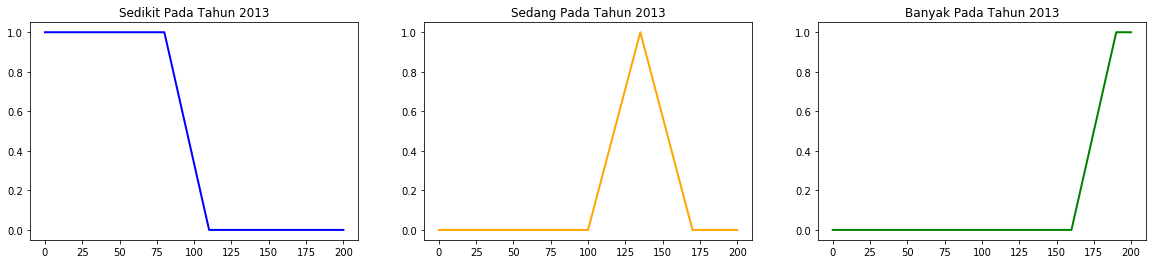

In [5]:
sedikit13 = fuzz.trapmf(thn13,  [0, 0, 80, 110])
sedang13 = fuzz.trimf(thn13, [100, 135, 170])
banyak13 = fuzz.trapmf(thn13, [160, 190, 200, 200])
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3,figsize=(20,4))
ax0.plot(thn13,sedikit13,'blue', linewidth=2, label='Sedikit Pada Tahun 2013')
ax1.plot(thn13,sedang13,'orange', linewidth=2, label='Sedang Pada Tahun 2013')
ax2.plot(thn13,banyak13,'green', linewidth=2, label='Banyak Pada Tahun 2013')
ax0.set_title('Sedikit Pada Tahun 2013')
ax1.set_title('Sedang Pada Tahun 2013')
ax2.set_title('Banyak Pada Tahun 2013')

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


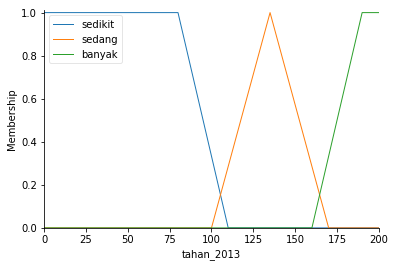

In [7]:
tahun_2013.view()

- Plotting fungsi keanggotaan tahun 2014 $\mu sedikit(x)$, $\mu sedang(x)$, dan $\mu banyak(x)$

Text(0.5,1,'Banyak Pada Tahun 2014')

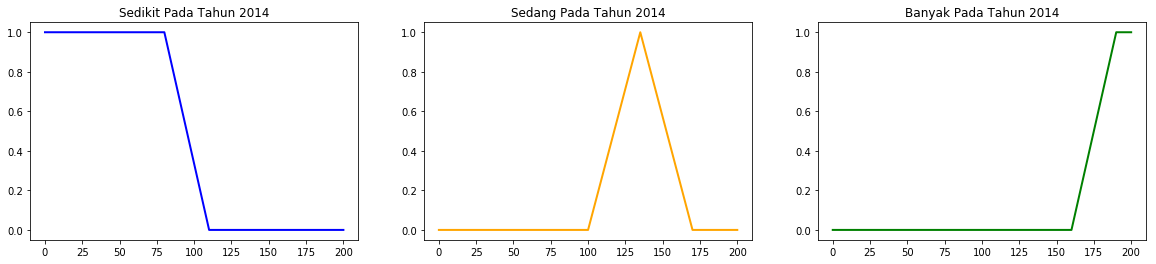

In [10]:
sedikit14 = fuzz.trapmf(thn14, [0, 0, 110, 140])
sedang14 = fuzz.trimf(thn14, [130, 175, 220])
banyak14 = fuzz.trapmf(thn14,[210, 245, 280, 280])

fig, (ax0, ax1, ax2) = plt.subplots(ncols=3,figsize=(20,4))
ax0.plot(thn13,sedikit13,'blue', linewidth=2, label='Sedikit Pada Tahun 2014')
ax1.plot(thn13,sedang13,'orange', linewidth=2, label='Sedang Pada Tahun 2014')
ax2.plot(thn13,banyak13,'green', linewidth=2, label='Banyak Pada Tahun 2014')
ax0.set_title('Sedikit Pada Tahun 2014')
ax1.set_title('Sedang Pada Tahun 2014')
ax2.set_title('Banyak Pada Tahun 2014')

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


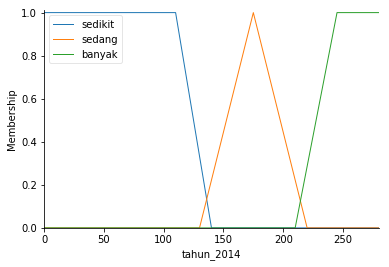

In [11]:
tahun_2014.view()

Text(0.5,1,'Naik')

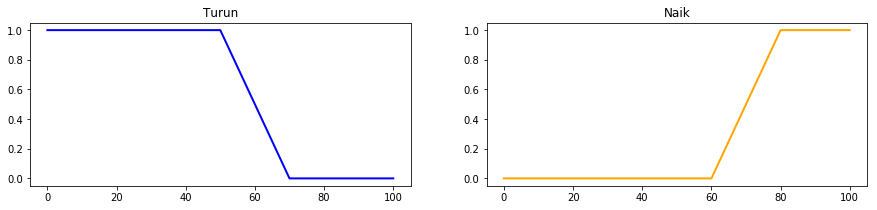

In [12]:
turun = fuzz.trapmf(putusan, [0, 0, 50, 70])
naik = fuzz.trapmf(putusan,[60, 80, 100, 100])

fig, (ax0, ax1) = plt.subplots(ncols=2,figsize=(15,3))
ax0.plot(putusan,turun,'blue', linewidth=2, label='Turun')
ax1.plot(putusan,naik,'orange', linewidth=2, label='Naik')
ax0.set_title('Turun')
ax1.set_title('Naik')

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


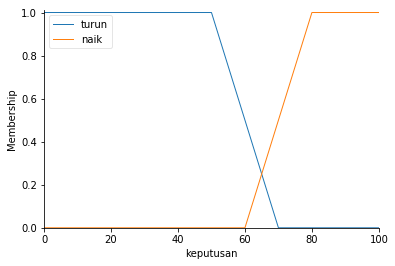

In [7]:
keputusan.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2a2d17795c0>)

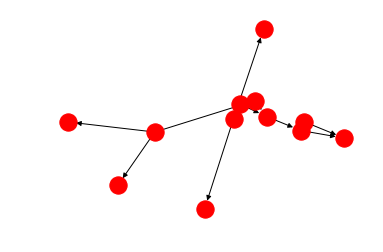

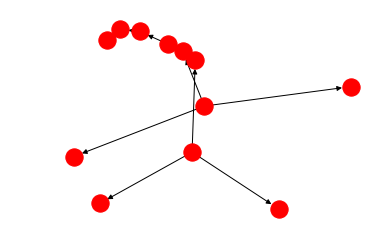

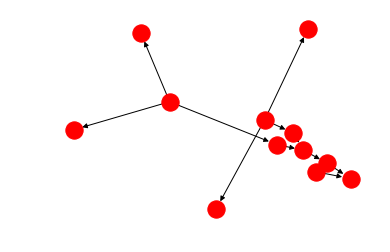

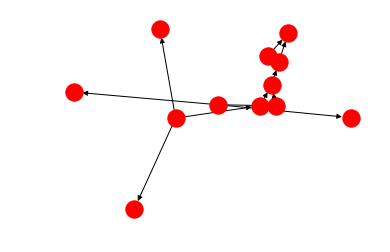

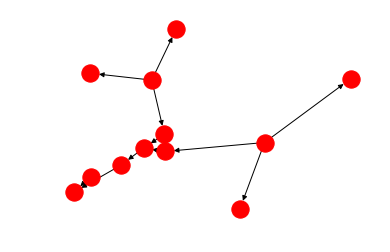

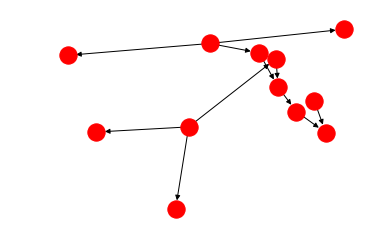

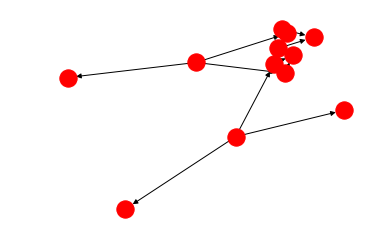

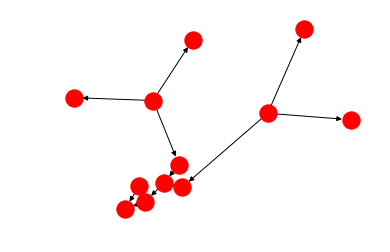

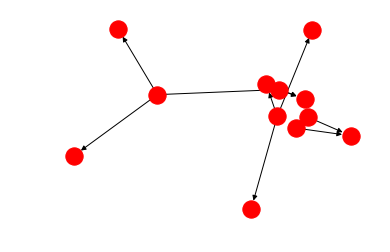

In [21]:
rule1 = ctrl.Rule(tahun_2013['sedikit'] & tahun_2014['sedikit'], keputusan['naik'])
rule2 = ctrl.Rule(tahun_2013['sedikit'] & tahun_2014['sedang'], keputusan['turun'])
rule3 = ctrl.Rule(tahun_2013['sedikit'] & tahun_2014['banyak'], keputusan['naik'])
rule4 = ctrl.Rule(tahun_2013['sedang'] & tahun_2014['sedikit'], keputusan['naik'])
rule5 = ctrl.Rule(tahun_2013['sedang'] & tahun_2014['sedang'], keputusan['turun'])
rule6 = ctrl.Rule(tahun_2013['sedang'] & tahun_2014['banyak'], keputusan['naik'])
rule7 = ctrl.Rule(tahun_2013['banyak'] & tahun_2014['sedikit'], keputusan['naik'])
rule8 = ctrl.Rule(tahun_2013['banyak'] & tahun_2014['sedang'], keputusan['turun'])
rule9 = ctrl.Rule(tahun_2013['banyak'] & tahun_2014['banyak'], keputusan['naik'])

rule1.view()
rule2.view()
rule3.view()
rule4.view()
rule5.view()
rule6.view()
rule7.view()
rule8.view()
rule9.view()

# Rule Evaluation

In [22]:
keputusan_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, 
                                   rule4, rule5, rule6, rule7, rule8, rule9])

# Defuzzifikasi

Rules yang sudah dievaluasi, kemudian menggunakan fungsi ControlSystemSimulation untuk menyiapkan perhitungan defuzzifikasi sebelum dimasukkan 2 input data dari Tahun 2013 dan Tahun 2014.

In [23]:
hasil = ctrl.ControlSystemSimulation(keputusan_ctrl)

In [24]:
hasil.input['tahan_2013'] = 150
hasil.input['tahun_2014'] = 200

- Melakukan perhitungan defuzzy

In [26]:
hasil.compute()

- Mencetak hasil defuzzy (Python)

In [27]:
print(hasil.output['keputusan'])

32.82799748901448


C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


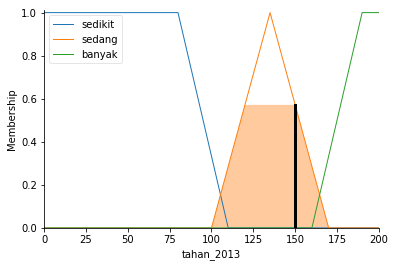

In [28]:
tahun_2013.view(sim=hasil)

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


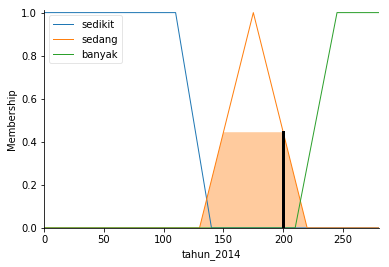

In [29]:
tahun_2014.view(sim=hasil)

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


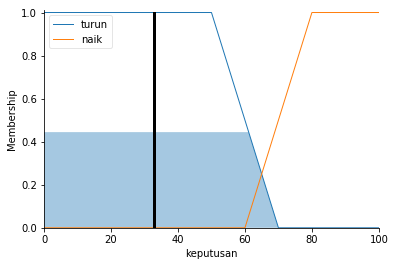

In [30]:
keputusan.view(sim=hasil)

# Perhitungan Secara Manual

Diketahui :
- Tahun 2013 : 150
- Tahun 2014 : 200

Ditanya :
- Hasil Keputusan ?

**Jawab :**

**Tahun 2013 : 150**

\begin{equation}
  tahun2013['sedikit'] = \mu sedikit(x)=\begin{cases}
    1; & \text{$x\leq 80$}.\\
    \frac {110 - x}{110 - 80}; & \text{$80 \leq x \leq 110$}.\\
    0; & \text{$x\geq 110$}. \checkmark
  \end{cases}
  \\
  tahun2013['sedang'] = \mu sedang(x)=\begin{cases}
    0; & \text{$x\leq 100$ atau $x\geq 170$}.\\
    \frac {x - 100}{135 - 100}; & \text{$100 \leq x \leq 135$}.\\
    \frac {x - 135}{170 - 135}; & \text{$135 \leq x \leq 170$}.\checkmark\\
  \end{cases}
  \\
  tahun2013['banyak'] = \mu banyak(x)=\begin{cases}
    0; & \text{$x\leq 160$}.\checkmark \\
    \frac {x - 160}{190 - 160}; & \text{$160 \leq x \leq 190$}.\\
    1; & \text{$x \geq 190$}.\\
  \end{cases}
\end{equation}

\begin{equation}
    \mu sedang(150) = \frac {150-135}{170-135} \\
    \mu sedang(150) = \frac {15}{35} \\ 
    \mu sedang(150) = 0.43 \\
\end{equation}

**Tahun 2014 : 200**

\begin{equation}
  tahun2014['sedikit'] = \mu sedikit(x)=\begin{cases}
    1; & \text{$x\leq 105$}.\\
    \frac {140 - x}{140 - 105}; & \text{$105 \leq x \leq 140$}.\\
    0; & \text{$x\geq 140$}.\checkmark
  \end{cases}
  \\
  tahun2014['sedang'] = \mu sedang(x)=\begin{cases}
    0; & \text{$x\leq 130$ atau $x\geq 220$}.\\
    \frac {x - 130}{175 - 130}; & \text{$130 \leq x \leq 175$}.\\
    \frac {175 - x}{220 - 175}; & \text{$175 \leq x \leq 220$}.\checkmark \\
  \end{cases}
  \\
  tahun2014['banyak'] = \mu banyak(x)=\begin{cases}
    0; & \text{$x\leq 210$}.\checkmark \\
    \frac {x - 210}{245 - 210}; & \text{$210 \leq x \leq 245$}.\\
    1; & \text{$x \geq 245$}.\\
  \end{cases}
\end{equation}

\begin{equation}
    \mu sedang(200) = \frac {200-175}{220-175} \\
    \mu sedang(200) = \frac {25}{45} \\ 
    \mu sedang(200) = 0.56 \\
\end{equation}